## Problem Set 5

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [9]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.5

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1a (10 points)

Please load the true_labels_pred_probs.csv file from the data folder into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem. Class 0 indicates a patient does not have a disease, while Class 1 indicates that a patient does have the disease.

Please prepare the predicted classes for a critical probability of 25%, 50%, and 75% and create three confusion matrix plots. Put the critical probability value in the title. In a paragraph, explain how the model's performance is impacted by the critical probability with respect to the confusion matrices. Given the model's specified deployment task, what are the implications of choosing one of the critical probabilities over the other?

In [10]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

df = pd.read_csv("data/true_labels_pred_probs.csv")
print(df.head())
y_true = df.iloc[:,0]
p1 = df.iloc[:,2]

   y_true  pred_prob_class0  pred_prob_class1
0       0          0.705171          0.294829
1       0          0.811506          0.188494
2       1          0.123507          0.876493
3       0          0.932019          0.067981
4       0          0.884029          0.115971


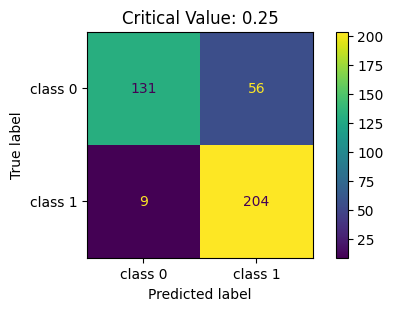

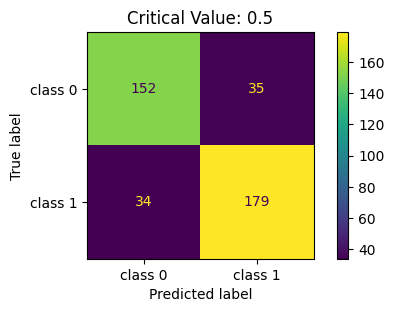

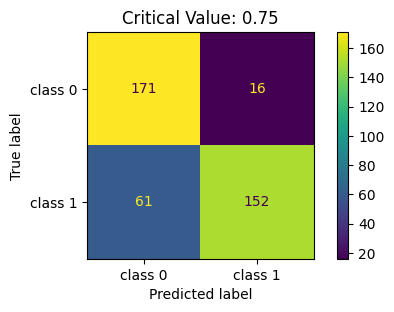

In [11]:
cv = [0.25, 0.5, 0.75]
for c in cv:
    y_pred = np.zeros(len(df))
    y_pred[p1 < c] = 0
    y_pred[p1 > c] = 1

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['class 0', 'class 1'])
    fig, ax = plt.subplots(figsize=(5,3))
    disp.plot(ax=ax)
    plt.tight_layout()
    plt.title(f"Critical Value: {c}")
    plt.show()

**your explanation here**

The confusion matrices depict how the model's performance varies with critical probability thresholds. As the critical probability increases from 0.25 to 0.75, the number of false positives (actual class 0 but predicted as class 1) decreases, and the number of true negatives (actual class 0 and predicted as class 0) increases. Conversely, the number of false negatives (actual class 1 but predicted as class 0) increases, indicating that more patients with the disease are being misclassified as disease-free as the threshold rises.

When deploying a model for predicting the presence of a disease, the consequences of misclassification can be significant. A false positive might lead to unnecessary stress, additional testing, or treatment for a patient, while a false negative could result in a missed diagnosis, potentially delaying crucial treatment. If the goal is to minimize false negatives to ensure patients with the disease are identified, a lower critical probability (e.g., 0.25) might be preferred. However, this comes at the cost of increased false positives. On the other hand, a higher threshold, like 0.75, will reduce false positives but increase the risk of missing patients with the disease. The choice of critical probability should be based on the relative costs and consequences of false positives versus false negatives in the specific deployment context.

### Problem 1b (9 points)

Calculate and plot the accuracy, precision, recall, f0.5, f1, f1.5 scores using the sorted values from the Class 1 predicted probabilities as critical probabilities!

What critical probability maximizes each of the scores (one critical probability per score)? That critical probability is what you should use to maximize the scores.

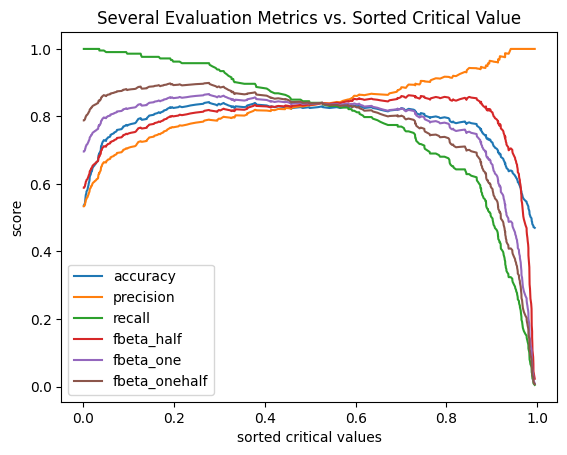

In [12]:
# your code here 

def score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fbeta_half = fbeta_score(y_true, y_pred, beta=0.5)
    fbeta_one = fbeta_score(y_true, y_pred, beta=1)
    fbeta_onehalf = fbeta_score(y_true, y_pred, beta=1.5)
    return accuracy, precision, recall, fbeta_half, fbeta_one, fbeta_onehalf

accuracy_count = []
precision_count = []
recall_count = []
fbeta_half_count = []
fbeta_one_count = []
fbeta_onehalf_count = []

p1_sort = np.sort(p1)
y_pred = np.zeros(len(p1_sort))

for cv in p1_sort:
    y_pred[p1 < cv] = 0
    y_pred[p1 > cv] = 1
    accuracy, precision, recall, fbeta_half, fbeta_one, fbeta_onehalf = score(y_true, y_pred)
    accuracy_count.append(accuracy)
    precision_count.append(precision)
    recall_count.append(recall)
    fbeta_half_count.append(fbeta_half)
    fbeta_one_count.append(fbeta_one)
    fbeta_onehalf_count.append(fbeta_onehalf)
    
plt.plot(p1_sort, accuracy_count, label = 'accuracy')
plt.plot(p1_sort, precision_count, label = 'precision')
plt.plot(p1_sort, recall_count, label = 'recall')
plt.plot(p1_sort, fbeta_half_count, label = 'fbeta_half')
plt.plot(p1_sort, fbeta_one_count, label = 'fbeta_one')
plt.plot(p1_sort, fbeta_onehalf_count, label = 'fbeta_onehalf')
plt.legend()
plt.xlabel("sorted critical values")
plt.ylabel("score")
plt.title("Several Evaluation Metrics vs. Sorted Critical Value")
plt.show()

In [13]:
print("the best critical value for accuracy:", p1_sort[np.argmax(accuracy_count)])
print("the best critical value for precision:", p1_sort[np.argmax(precision_count)])
print("the best critical value for recall:", p1_sort[np.argmax(recall_count)])
print("the best critical value for f0.5:", p1_sort[np.argmax(fbeta_half_count)])
print("the best critical value for f1:", p1_sort[np.argmax(fbeta_one_count)])
print("the best critical value for f1.5:", p1_sort[np.argmax(fbeta_onehalf_count)])

the best critical value for accuracy: 0.2768401695556748
the best critical value for precision: 0.941692907023554
the best critical value for recall: 0.0008787104301093
the best critical value for f0.5: 0.7165174024688505
the best critical value for f1: 0.2768401695556748
the best critical value for f1.5: 0.2768401695556748


Based on the provided graph illustrating the relationship between various evaluation metrics and sorted critical values, the optimal thresholds for each score can be inferred as follows: 

the best critical value for accuracy: 0.2768401695556748

the best critical value for precision: 0.941692907023554

the best critical value for recall: 0.0008787104301093

the best critical value for f0.5: 0.7165174024688505

the best critical value for f1: 0.2768401695556748

the best critical value for f1.5: 0.2768401695556748

### Problem 1c (3 points)

One of the curves you plotted is non-decreasing and another curve is non-increasing. Which evaluation metrics correspond to these two curves and why is this a problem when you try to tune the critical probability? Explain your answer in a few sentences.


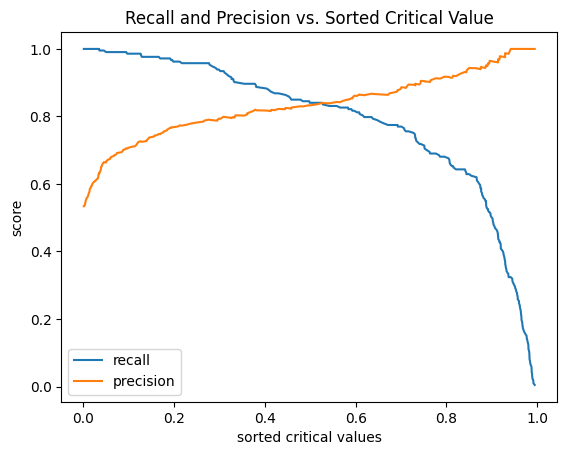

In [14]:
plt.plot(p1_sort, recall_count, label = 'recall')
plt.plot(p1_sort, precision_count, label = 'precision')
plt.legend()
plt.xlabel("sorted critical values")
plt.ylabel("score")
plt.title("Recall and Precision vs. Sorted Critical Value")
plt.show()

**your explanation here**

Recall (depicted by the blue line) is non-increasing, meaning it starts at a high value and decreases as the critical value increases. On the other hand, precision (represented by the orange line) is non-decreasing, starting at a lower value and rising with the increase in the critical value. This inverse relationship between recall and precision when tuning the critical probability emphasizes the trade-off between the two metrics. As the threshold is adjusted to improve precision, recall tends to decrease, and vice versa. Consequently, selecting an optimal threshold necessitates finding a balance that meets specific requirements, as maximizing one metric might adversely affect the other. This inherent trade-off underscores the challenge of refining machine learning models using a single evaluation criterion without considering its broader implications.

### Problem 2a (5 points)

Work with true_labels_pred_probs.csv again. 

Calculate the points on the ROC curve and plot it. 

Print out the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. 

Check out the wikipedia page of the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations) to read more about other ways to determine the best critical probability, and other ways to summarize the ROC curve.

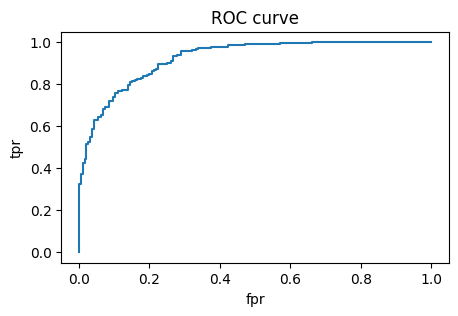

In [15]:
# your code here 
from sklearn.metrics import roc_curve
fpr, tpr, p_crits = roc_curve(y_true, p1)
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [16]:
# Calculate the Euclidean distance for each point from the top-left corner (0,1)
distances = np.sqrt((0 - fpr) ** 2 + (1 - tpr) ** 2)

# Find the index of the shortest distance
best_index = np.argmin(distances)
best_threshold = p_crits[best_index]

print("Best critical probability:", best_threshold)

Best critical probability: 0.5967301685054103


The best critical value is 0.5967301685054103

### Problem 2b (10 points)

We discussed in class that the baseline accuracy of a classification model is equal to the fraction of points that belong to the most populous class. For example, if 80% of points belong to class 0 and 20% of points belong to class 1, we could predict class 0 for all points and the accuracy of our model would be 80%. Keep this concept and methodology in mind and answer the questions below.

Q1: How would you calculate the baseline f1 score in classification? Let's assume $n_0$ points are in class 0 and $n_1 = n - n_0$ points are in class 1 where $n$ is the number of points in your dataset, and $n_0 > n_1$ so class 1 is the minority class. Work out the solution on pen and paper. Include your logic below and express the f1 score using $p$ and/or $r$.

**your explanation here**

In a classification scenario where we predict only the majority class, the baseline F1 score can be derived from precision (p) and recall (r). If we always predict the majority class, class 0, the true positive count for the minority class, class 1 (positive cases), is zero, leading to a precision of zero since we never correctly predict class 1. Similarly, the recall is zero because all actual instances of class 1 are incorrectly classified as class 0. The F1 score, which is the harmonic mean of precision and recall, would also be zero in this case (it is undefined becuase the denominator is 0). 

If we predict all the points to class 1, given that $n_0$ is the number of instances in class 0 and $n$ is the total number of instances, the precision (p) becomes $n_1/n$. The recall (r) now is 1 since we have captured all the positive instances. Consequently, the F1 score is computed as $2p/(1+p)$.

Q2: Generalize your Q1 solution to the f_beta score. Usually the f_beta score is used when the classification problem is imbalanced. Prepare a figure which shows the baseline f_beta score for beta = 0.5, 1, and 2 when the fraction of points that belong to class 0 is between 0.95 and 1 in the target variable. Use 51 linearly spaced values between 0.95 and 1.
Create a plot with three curves, one curve per beta value. Don't forget to add axes labels, a title, and a legend.

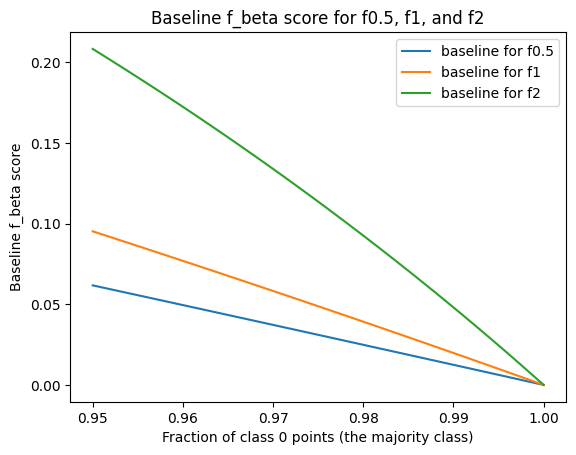

In [23]:
# your code here
values = np.linspace(0.95, 1, 51)
f1_count = []
fhalf_count = []
f2_count = []
for v in values:
    p = 1-v
    f_1 = 2*p/(1+p)
    f_half = 1.25*p/(0.25*p+1)
    f_2 = 5*p/(4*p+1)
    f1_count.append(f_1)
    fhalf_count.append(f_half)
    f2_count.append(f_2)

plt.plot(values, fhalf_count, label = "baseline for f0.5")
plt.plot(values, f1_count, label = "baseline for f1")
plt.plot(values, f2_count, label = "baseline for f2")
plt.legend()
plt.xlabel("Fraction of class 0 points (the majority class)")
plt.ylabel("Baseline f_beta score")
plt.title("Baseline f_beta score for f0.5, f1, and f2")
plt.show()

### Problem 2c (10 points)

There are multiple ways to calculate the f1 score in a multiclass classification problem. Look up three different approaches and explain how to calculate them in a short description with equations. Create a simple toy dataset and calculate the f1 scores using sklearn. Discuss the pros and cons of each approach.

**your explanation here**

1. Macro-average F1 score:
- Description: Computes the F1 score independently for each class and then averages the scores, treating each class equally.
- Equation: 
  $$ F1_{\text{macro}} = \frac{1}{K} \sum_{k=1}^{K} F1_k $$
  Where \( K \) denotes the number of classes and \( F1_k \) is the F1 score for class \( k \).
- Pros: Treats all classes equally.
- Cons: Might be insensitive to class imbalance.

2. Micro-average F1 score:
- Description: Aggregates the contributions from all classes to calculate the average F1 score. Useful when there's class imbalance.
- Equation: 
  $$ F1_{\text{micro}} = \frac{2 \times \text{TP}}{2 \times \text{TP} + \text{FP} + \text{FN}} $$
  Here, TP, FP, and FN represent global true positives, false positives, and false negatives, respectively.
- Pros: Sensitive to class imbalances.
- Cons: Might be too optimistic if one class has especially high true positives.

3. Weighted-average F1 score:
- **Description**: Computes the F1 score for each class and then averages them, but weights each class's F1 score by the number of true instances for that class.
- **Equation**: 
  $$ F1_{\text{weighted}} = \sum_{k=1}^{K} w_k \times F1_k $$
  Where \( w_k \) is the number of true instances for class \( k \).
- Pros: Takes class imbalance into account by weighting classes.
- Cons: Could be misleading if weights don't accurately reflect the real class importance.

In [17]:
# your code here

from sklearn.metrics import f1_score

# Toy dataset
y_true = np.array([0, 1, 2, 0, 1, 2])
y_pred = np.array([0, 1, 0, 0, 1, 2])

# Calculate F1 scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"Macro-average F1 score: {f1_macro}")
print(f"Micro-average F1 score: {f1_micro}")
print(f"Weighted-average F1 score: {f1_weighted}")

Macro-average F1 score: 0.8222222222222223
Micro-average F1 score: 0.8333333333333334
Weighted-average F1 score: 0.8222222222222223


### Problem 3 (5 points)

The true and predicted target variables of a regression problem are available in the `data/reg.cvs`. The goal of the model is to predict people's ages so the target variable's unit is year. 

We discussed the R2 score in class:

$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,
where $\bar{y}$ is the mean of $y$.

The baseline (or constant) regression model returns the mean of $y$ as prediction for all data points ($y_i' == \bar{y}$ for all $i$). So the baseline R2 score is 0.

Calculate and print the baseline R2, MSE, RMSE, and MAE, assuming that $y_i' == \bar{y}$ for all $i$. Make sure to include the units for each metric. 

Next, calculate and print the R2 score, MSE, RMSE, and MAE using the model predictions and add the units of the metrics.

In [22]:
# your code here

df2 = pd.read_csv("data/reg.csv")
print(df2.head())
print()
y_true = df2['y_true']
y_pred = df2['y_pred']
mean_y_true = np.mean(y_true)

baseline_mse = np.mean((y_true - mean_y_true) ** 2)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = np.mean(np.abs(y_true - mean_y_true))


mse = np.mean((y_true - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_true - y_pred))
r2_score = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - mean_y_true) ** 2))

print(f"Baseline R2 Score: {0.0}")
print(f"Baseline MSE: {baseline_mse}, the unit is years^2")
print(f"Baseline RMSE: {baseline_rmse}, the unit is years")
print(f"Baseline MAE: {baseline_mae}, the unit is years")
print()
print(f"Model R2 Score: {r2_score}")
print(f"Model MSE: {mse}, the unit is years^2")
print(f"Model RMSE: {rmse}, the unit is years")
print(f"Model MAE: {mae}, the unit is years")

      y_true     y_pred
0  48.712290  49.582760
1  95.958573  92.968500
2  78.023503  78.941111
3  67.089996  47.214307
4  30.793529  28.596810

Baseline R2 Score: 0.0
Baseline MSE: 589.1229249402501, the unit is years^2
Baseline RMSE: 24.27185458386421, the unit is years
Baseline MAE: 21.34778621318614, the unit is years

Model R2 Score: 0.8599431892772426
Model MSE: 82.51067799079387, the unit is years^2
Model RMSE: 9.083538847321227, the unit is years
Model MAE: 7.2111631295468, the unit is years
